**NOTEBOOK 9**

#### GENETIC ALGORITHMS
Genetic algorithms (GA) are able to solve a variety of optimization problems in which the aim is to minimize a cost function in order to find the best solution. In order to achieve this, GA leverage the ideas behind genetic evolution of species: the initial population evolves, thanks to crossover and mutation operations, towards a population with "better" individuals.  
The scheme of a generic GA works following these points: 

1. A starting population of $n$ chromosomes (following the genetic nomenclature) is generated;
2. A fitness function $f(x)$ is computed for each element of the current population. This fitness $f(x)$ is the cost function to be minimized and it is typical of the problem considered (in the case of the exercise below it is a length function);
3. A new population of $n$ elements (descendants) is generated repeating the following steps:

   - Select a pair of chromosomes "parents" from the current population with a selection probability            set in order to pick elements with the best fitness;
   - Cross the parents with a crossover probability $P_{c}$ in order to obtain two descendants. If no           crossover happens, then create an exact pair of parents;
   - Mutate the two descendants with a mutation probability $P_{m}$ randomly exchanging pieces of               chromosomes in random positions of the chromosomes themselves and inserting these two elements in the      new population;
4. Substitute the current population with the new generated population;
5. Repeat the algorithm from step 2;

The algorithm proceeds until a certain condition on the cost function is met (in optimization problems, for instance, until a global or local minimum is reached). As one may understand, the crossover operator is responsible for creating better individuals with the respect of the previous population while the mutation operator provides the population with diversity.  
In the following some specific details of the problem addressed in this exercise and the code implemented to solve it will be provided. 

### THE TRAVELING SALESMAN PROBLEM

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$


Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.


Apply your code to the optimization of a path among 

- <span style="color:blue">34 cities randomly placed **on** a circumference</span>
- <span style="color:blue">34 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path in cartesian coordinates</span>

#### CODE DETAILS 
An ordered sequence of cities is represented by an array of integers $[1, 3, 20, ...]$ meaning that the first visited city is the one with label 1, the second is the city with label 3, ecc... . 
In order to address the problem, the code was implemented with an object-oriented approach. In particular, the following classes were implemented: 

- class _City_ : this object contains information on the label and on the coordinates (circular or square)    associated to a city;
- class _Path_ : this object contains information on a specific sequence of cities and it also has a method to compute the length of the path that connects the cities in the sequence (check the code for further details;
- class _Genetics_ : this object contains information on the population (made up of objects of Path type) and on the methods to make it evolve. In fact, in this class the crossover, mutation and selection operators are implemented with other auxiliary methods (check function to verify that all the conditions on a path mentioned above are met, sort function to order the paths of the population according to their fitnesses for instance). Also, a function to compute the best path in a population was implemented.

The fitness of the individuals (paths) was evaluated via $L^{(1)}$. The mutation operators implemented were (all with probability $P_{m} = 0.08$): 

- Inversion Operator;
- Group Permutation Operator (m_operator in the code);
- Pair Permutation Operator;
- Shift Operator;

The crossover operator was instead called with probability $P_{c} = 0.9$. For what concerns the selection operator, it was implemented using the rule $j= int(M \times r^p)+1$ with $p = 3$, $M$ number of individuals in the population and $r \in [0,1)$ (the parameter p needed some tuning before finding the optimal value).  

The algorithm was run on a population of 500 individuals for 100 generations. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
best_path_circle_x, best_path_circle_y = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_09/exercise_9_01/best_path_circle_coordinates.dat", unpack=True, usecols=(0,1))
gen_circle, best_loss_circle, best_hm_loss_circle = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_09/exercise_9_01/average_circle.dat", unpack=True, usecols=(0,1,2))
best_path_square_x, best_path_square_y = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_09/exercise_9_01/best_path_square_coordinates.dat", unpack=True, usecols=(0,1))
gen_square, best_loss_square, best_hm_loss_square = np.loadtxt("/home/francesco/NumericalSimulationLaboratory/LSN_lecture_09/exercise_9_01/average_square.dat", unpack=True, usecols=(0,1,2))

**BEST PATHS**

Text(0.5, 1.0, 'Square')

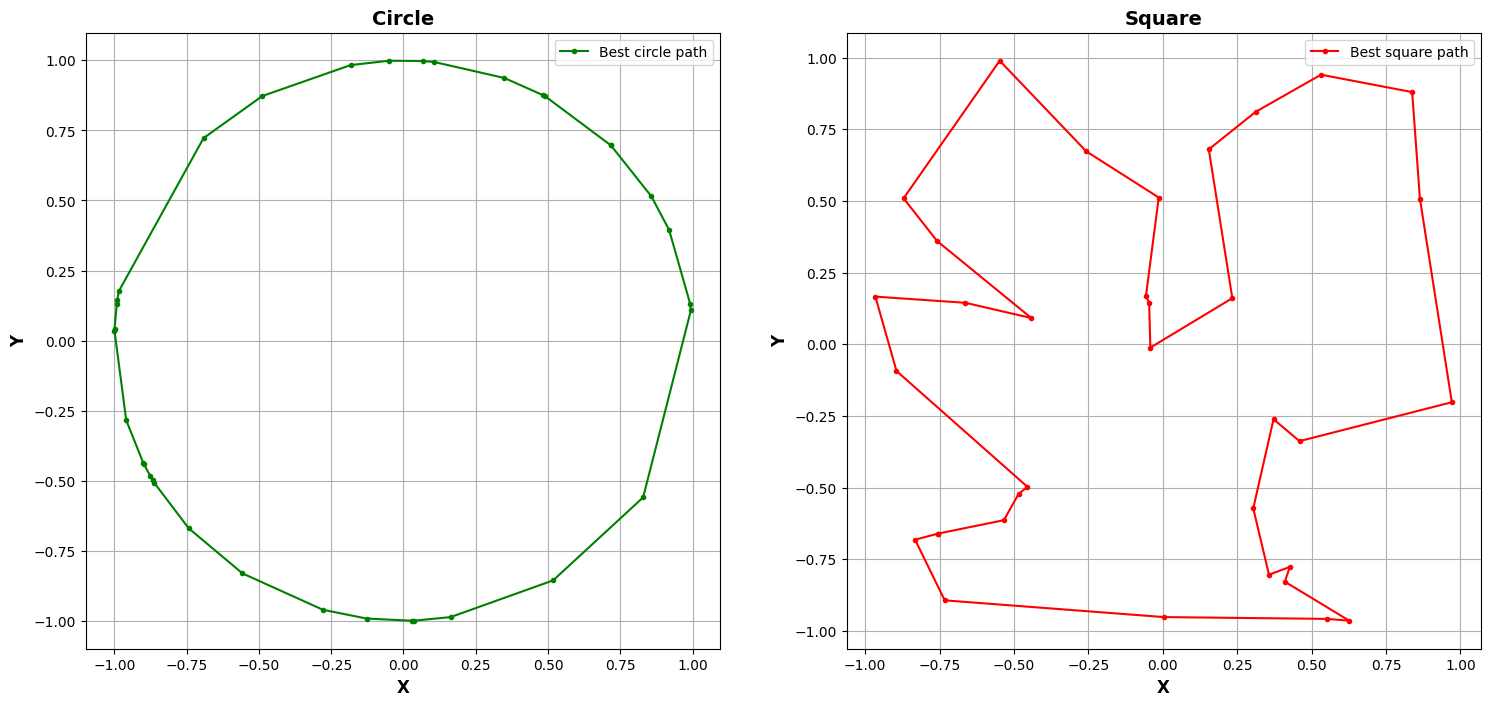

In [3]:
fig = plt.figure(figsize=(18, 8))

ax_1 = fig.add_subplot(1, 2, 1)
ax_1.plot(best_path_circle_x, best_path_circle_y, color="green", label="Best circle path", marker=".")
ax_1.set_xlabel('X', fontsize=12, fontweight='bold')
ax_1.set_ylabel('Y', fontsize=12, fontweight='bold')
ax_1.grid(True)
ax_1.legend()
ax_1.set_title("Circle", fontsize=14, fontweight='bold')

# Secondo sottografico: Potential Energy
ax_2 = fig.add_subplot(1, 2, 2)
ax_2.plot(best_path_square_x, best_path_square_y, color = "red", label="Best square path", marker=".")
ax_2.set_xlabel('X', fontsize=12, fontweight='bold')
ax_2.set_ylabel('Y', fontsize=12, fontweight='bold')
ax_2.grid(True)
ax_2.legend()
ax_2.set_title("Square", fontsize=14, fontweight='bold')

**BEST LOSSES**

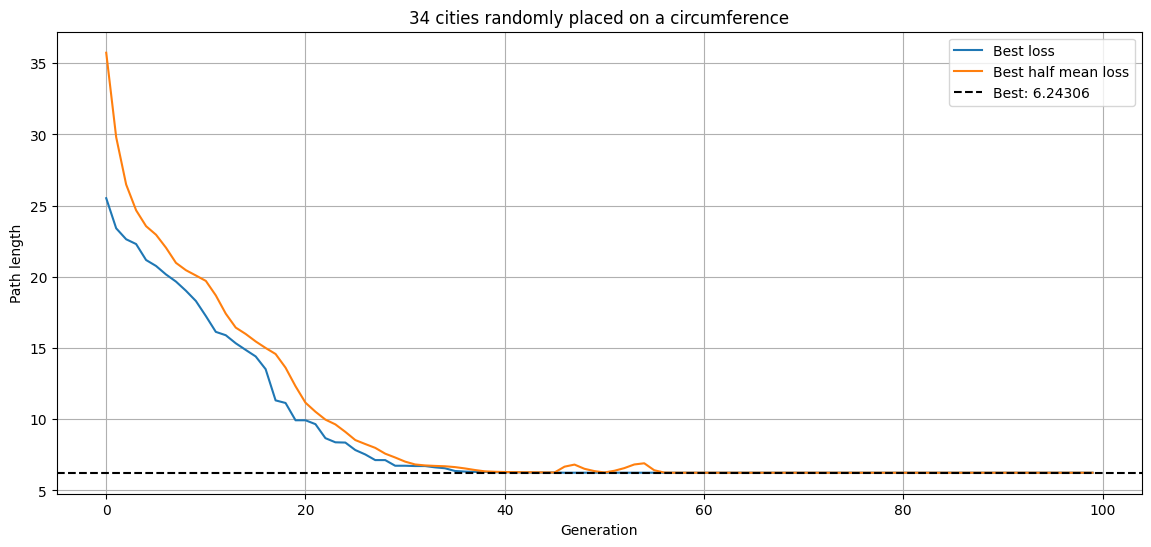

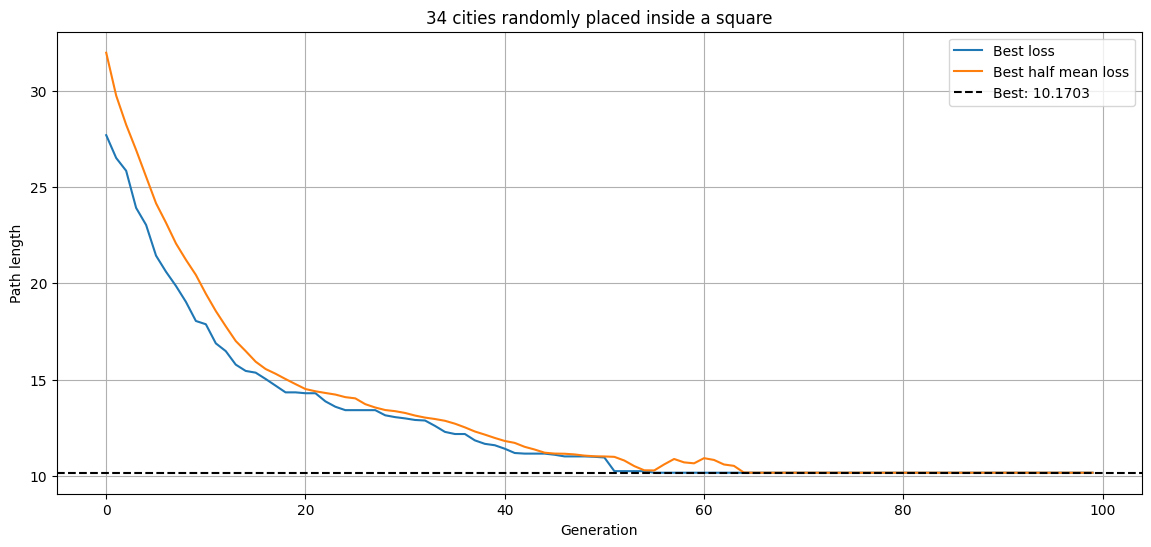

In [4]:
plt.figure(figsize=(14,6))
plt.plot(gen_circle, best_loss_circle, label='Best loss')
plt.plot(gen_circle, best_hm_loss_circle, label='Best half mean loss')
plt.axhline(best_loss_circle[99], color = "k", linestyle = "--", label = "Best: " + str(best_loss_circle[99]))
plt.title('34 cities randomly placed on a circumference') 
plt.xlabel('Generation')
plt.ylabel('Path length')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(14,6))
plt.plot(gen_square, best_loss_square, label='Best loss')
plt.plot(gen_square, best_hm_loss_square, label='Best half mean loss')
plt.axhline(best_loss_square[99], color = "k", linestyle = "--", label = "Best: " + str(best_loss_square[99]))
plt.title('34 cities randomly placed inside a square') 
plt.xlabel('Generation')
plt.ylabel('Path length')
plt.legend()
plt.grid()
plt.show()


For the circumference case, less than 40 generations are enough for the algorithm to converge wherease in the square case the algorithm needs $\sim 50$ generations. From the first two plots it is also clear that the path does not cross itself, and this indicates for this case the success of the genetic algorithm implemented. 